In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

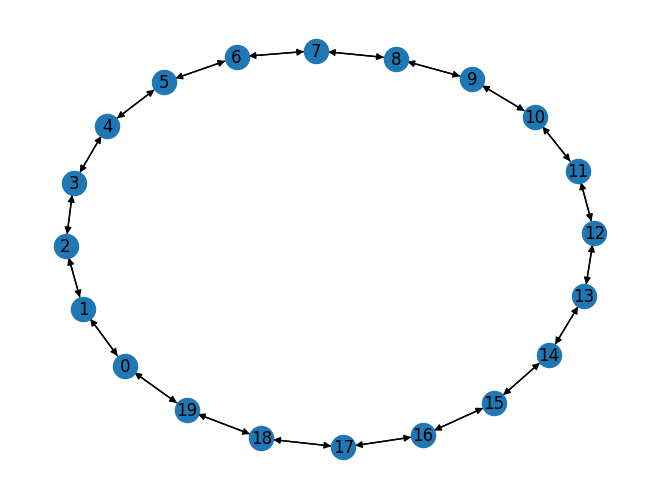

In [ ]:
def create_ring_graph(num_nodes):
    G = nx.DiGraph()

    for i in range(num_nodes):
        G.add_node(i)

    for i in range(num_nodes-1):
        G.add_edge(i, i+1)
        G.add_edge(i+1, i)

    G.add_edge(num_nodes-1, 0)
    G.add_edge(0, num_nodes-1)

    return G

def create_graph(num_nodes):

    Graph = create_ring_graph(num_nodes)

    Graph.add_edge(0, 5)
    Graph.add_edge(5, 0)

    Graph.add_edge(5, 10)
    Graph.add_edge(10, 5)

    Graph.add_edge(10, 15)
    Graph.add_edge(15, 10)

    Graph.add_edge(15, 0)
    Graph.add_edge(0, 15)


    Graph.add_edge(0, 10)
    Graph.add_edge(10, 0)

    Graph.add_edge(5, 15)
    Graph.add_edge(15, 5)

    return Graph


G = create_ring_graph(20)
nx.draw(G, with_labels=True)

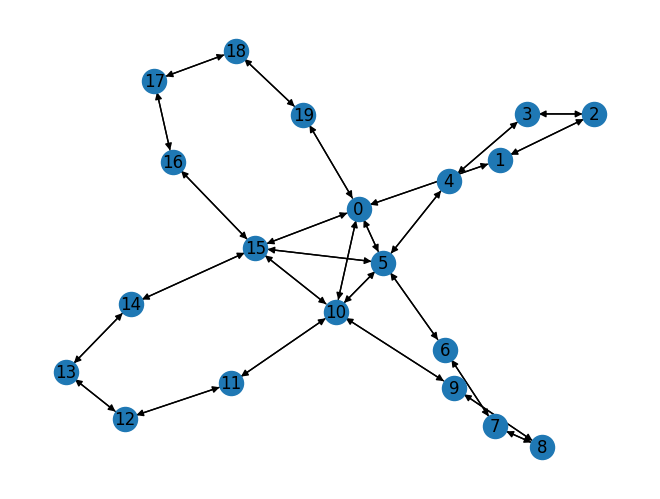

In [ ]:
G = create_graph(20)
nx.draw(G, with_labels=True)

In [ ]:
def generate_traffic_matrix(num_nodes, min=1, max=10, zero_prob=4):
    matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                if random.randint(1, zero_prob+1) <= zero_prob:
                    matrix[i, j] = 0
                else:
                    matrix[i, j] = random.randint(min, max)
    return matrix


M = generate_traffic_matrix(20, 3)
M

array([[ 0,  0,  0,  5, 10,  0,  9,  0,  6,  0,  0,  0, 10,  0,  0,  0,
         0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,
         9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 10,  7,  0,  0,  0,  9,  0,  7,  0,  0,  0,  0,  4,  0,  0,
         0,  0,  0,  7],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  5,  0,  6,  6,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 7,  6,  0,  0,  0,  0,  0,  0,  0,  6,  3,  0,  0,  0,  0,  0,
         0,  0,  0,  6],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,
        10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  9,  4,  0,
         0,  0,  0,  0],
       [ 0,  9,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  8,  4,  0,  0,
         0,  0,  0,  5],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  4,  0,  0,  0,  6,  0, 10,  6,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  4

In [ ]:
def assign_capacities(graph, low=1000, high=5000):

    capacities = {} # maximal bits flow per sec in an edge

    for edge in graph.edges():
        capacity = random.randint(low, high)
        capacities[edge] = capacity
    return capacities

C = assign_capacities(G)

print(C)

{(0, 1): 2261, (0, 19): 2067, (0, 5): 1857, (0, 15): 3521, (0, 10): 4739, (1, 0): 2566, (1, 2): 4886, (2, 1): 2198, (2, 3): 4818, (3, 2): 1286, (3, 4): 3273, (4, 3): 2645, (4, 5): 1494, (5, 4): 2314, (5, 6): 1934, (5, 0): 4548, (5, 10): 3174, (5, 15): 3545, (6, 5): 3119, (6, 7): 2208, (7, 6): 1096, (7, 8): 2332, (8, 7): 3886, (8, 9): 2666, (9, 8): 3804, (9, 10): 4105, (10, 9): 1513, (10, 11): 4683, (10, 5): 3841, (10, 15): 4323, (10, 0): 1141, (11, 10): 4649, (11, 12): 2973, (12, 11): 2152, (12, 13): 1803, (13, 12): 3919, (13, 14): 4072, (14, 13): 3184, (14, 15): 2998, (15, 14): 3433, (15, 16): 1387, (15, 10): 2069, (15, 0): 4007, (15, 5): 4232, (16, 15): 1642, (16, 17): 3748, (17, 16): 2871, (17, 18): 1530, (18, 17): 1913, (18, 19): 4732, (19, 18): 4621, (19, 0): 1202}


In [ ]:
def calculate_reliability(graph, flows, capacities, m, T_max):

    # function checks T < T_max condition

    total_delay = 0
    G = sum(flows.values())

    for (u, v), flow in flows.items():

        capacity = capacities[(u, v)]

        delay_component = flow / (capacity / m - flow)
        total_delay += delay_component

    T = total_delay / G

    return T < T_max

In [ ]:
def calculate_real_flows(graph, traffic_matrix):

    actual_flows = np.zeros_like(traffic_matrix)

    for i in range(len(traffic_matrix)):
        for j in range(len(traffic_matrix)):
            if traffic_matrix[i][j] != 0:
                path = nx.shortest_path(graph, source=i, target=j, weight='weight')
                for k in range(len(path) - 1):
                    actual_flows[path[k], path[k+1]] += traffic_matrix[i][j]

    edge_flow_dict = {}

    for i, j in graph.edges():
        flow_value = actual_flows[i][j]
        edge_flow_dict[(i, j)] = flow_value

    return edge_flow_dict

In [ ]:
def remove_random_edges(G, P):
    for edge in list(G.edges):
        if random.random() < P:
            G.remove_edge(*edge)
    return G

In [ ]:
def run_simulation(num_nodes, num_reps, m, T_max, g_type, low, high, min, max, fail_prob):

    success_count = 0

    if g_type == 0:
          graph_cpy = create_ring_graph(num_nodes)
    else:
          graph_cpy = create_graph(num_nodes)

    for _ in range(num_reps):

        graph = graph_cpy

        graph = remove_random_edges(graph, fail_prob)
        if not(nx.is_strongly_connected(graph)):
            #print("graph is not connected")
            continue


        traffic_matrix = generate_traffic_matrix(num_nodes, min, max)
        capacities = assign_capacities(graph, low, high)


        flows = calculate_real_flows(graph, traffic_matrix)

        #print(capacities)
        #print(flows)

        if calculate_reliability(graph, flows, capacities, m, T_max):
            success_count += 1

    reliability = success_count / num_reps

    return reliability

Test nr.1.1 Avarage: 0.0009
Test nr.2.1 Avarage: 0.0003
Test nr.3.1 Avarage: 0.0011
Test nr.4.1 Avarage: 0.0009
Test nr.5.1 Avarage: 0.0009
Test nr.6.1 Avarage: 0.0016
Test nr.7.1 Avarage: 0.0033
Test nr.8.1 Avarage: 0.0021
Test nr.9.1 Avarage: 0.001
Test nr.10.1 Avarage: 0.0003
Test nr.1.2 Avarage: 0.0002
Test nr.2.2 Avarage: 0.0001
Test nr.3.2 Avarage: 0.0003
Test nr.4.2 Avarage: 0.0001
Test nr.5.2 Avarage: 0.0002
Test nr.6.2 Avarage: 0.0
Test nr.7.2 Avarage: 0.0
Test nr.8.2 Avarage: 0.0001
Test nr.9.2 Avarage: 0.0005
Test nr.10.2 Avarage: 0.0002
[0.0009, 0.0003, 0.0011, 0.0009, 0.0009, 0.0016, 0.0033, 0.0021, 0.001, 0.0003]
[0.0002, 0.0001, 0.0003, 0.0001, 0.0002, 0.0, 0.0, 0.0001, 0.0005, 0.0002]


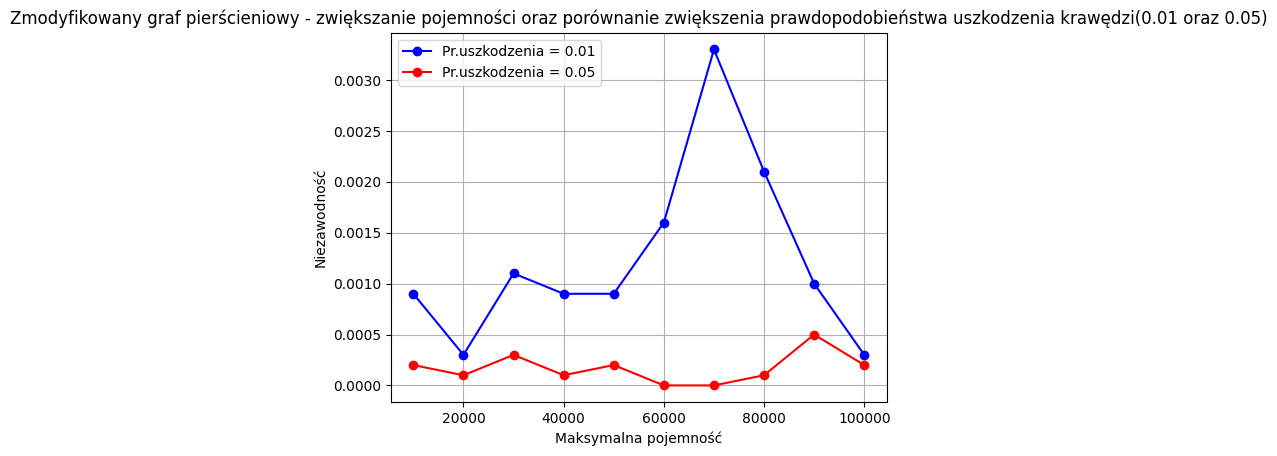

In [ ]:

# Parameters

num_nodes = 20 # number of nodes

m = 100  # average packet size in bits
T_max = 0.03  # max allowable average delay
g_type = 1 # 0 is ring graph 1 is extended ring graph

low = 5000 # min capacity value
high = 10000 # max capacity value

min = 1 # min packets amount in flow matrix
max = 10  # max packets value in flow matrix

fail_prob = 0.01 # edge failing probability

num_reps = 10000 # number of a specific test repetitions

results = []

for i in range(1,11):
    result = run_simulation(num_nodes, num_reps, m, T_max, g_type, low, high*i, min, max, fail_prob)
    results.append(result)
    print(f"Test nr.{i}.1 Avarage: {result}")

results2 = []

for i in range(1,11):
    result = run_simulation(num_nodes, num_reps, m, T_max, g_type, low, high*i, min, max, fail_prob*5)
    results2.append(result)
    print(f"Test nr.{i}.2 Avarage: {result}")

print(results)
print(results2)

x_values = range(10000,100001,10000)

#plt.figure(figsize=(10, 6))
plt.plot(x_values, results, marker='o', color="blue", label="Pr.uszkodzenia = 0.01")
plt.plot(x_values, results2, marker='o', color="red", label="Pr.uszkodzenia = 0.05")

plt.title("Zmodyfikowany graf pierścieniowy - zwiększanie pojemności oraz porównanie zwiększenia prawdopodobieństwa uszkodzenia krawędzi(0.01 oraz 0.05)")
plt.xlabel("Maksymalna pojemność")
plt.ylabel("Niezawodność")
plt.grid(True)
plt.legend()

plt.show()
